In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [32]:
df=pd.read_csv('WhatsgoodlyData-10.csv')

In [33]:
def data_overview(df):
    print("Dataset Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe())



In [34]:
data_overview(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question             516 non-null    object 
 1   Segment Type         516 non-null    object 
 2   Segment Description  516 non-null    object 
 3   Answer               516 non-null    object 
 4   Count                516 non-null    int64  
 5   Percentage           516 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 24.3+ KB
None

Missing Values:
Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64

Summary Statistics:
             Count  Percentage
count   516.000000  516.000000
mean     73.658915    0.250004
std     353.258001    0.296293
min       0.000000    0.000000
25%       0.000000    0.000000
50%       4.000000  

In [35]:
# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Question:
['You open ur phone and have a notif badge on instagram, facebook, snapchat, and linkedin...which do you click first?']

Unique values in Segment Type:
['Mobile' 'Web' 'Gender' 'University' 'Custom']

Unique values in Segment Description:
['Mobile respondents' 'Web-based respondents' 'Female respondents'
 'Male respondents' 'John Glenn High School' 'Alfred State University'
 'Johns Hopkins University' 'Chapman University' 'Hillsdale College'
 'University of New Hampshire' 'University of North Carolina'
 'Vanderbilt University' 'University of Virginia' 'University of Texas'
 'Cornell University' 'Butler University' 'University of Illinois'
 'University of Washington' 'Cal Poly San Luis Obispo'
 'Penn State University' 'University of Michigan'
 'Northwestern University' 'Montgomery Blair High School'
 'University of Alabama' 'James Madison University'
 'Texas Christian University' 'Texas A&M University'
 'University of Arkansas' 'San Diego State University'
 '

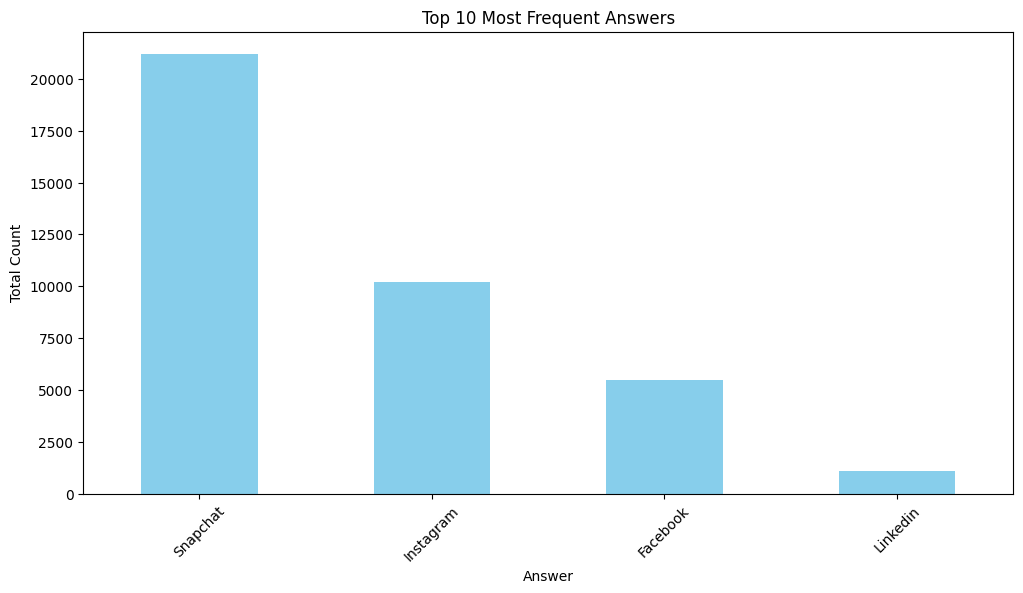

In [36]:

# Top responses by Count
top_responses = df.groupby('Answer')['Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_responses.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Frequent Answers")
plt.xlabel("Answer")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.show()




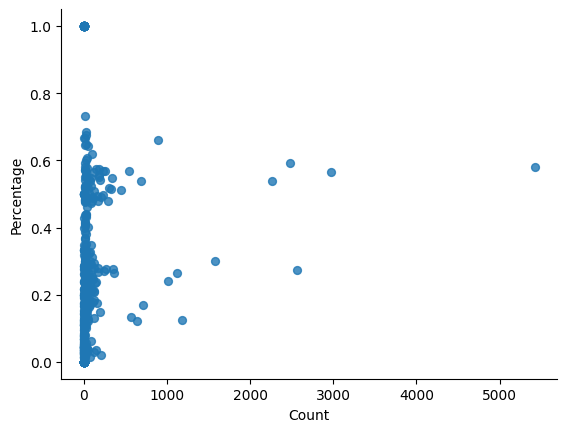

In [37]:

df.plot(kind='scatter', x='Count', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

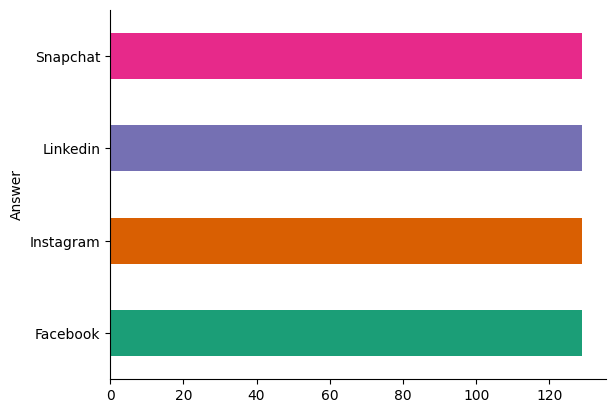

In [38]:
df.groupby('Answer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

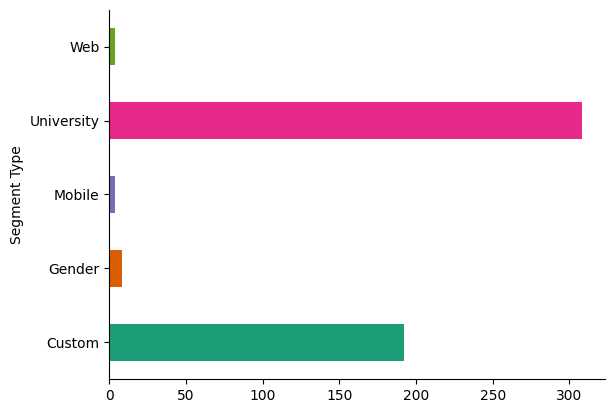

In [39]:
# @title Segment Type

df.groupby('Segment Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

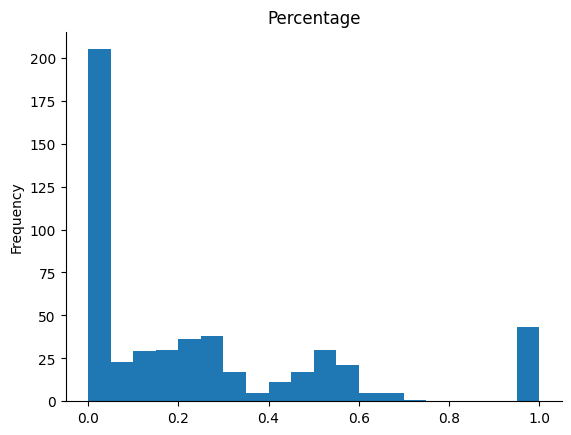

In [40]:
# @title Percentage

df['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

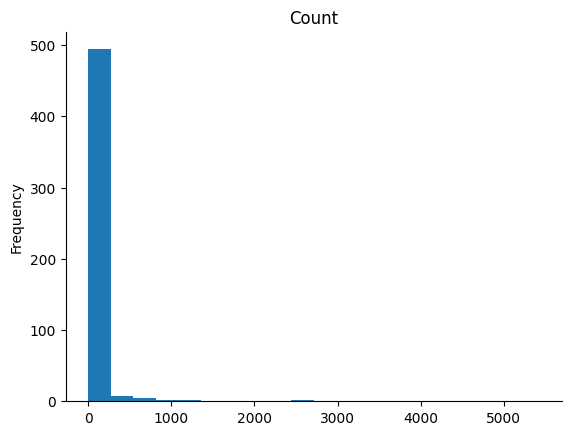

In [41]:

df['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

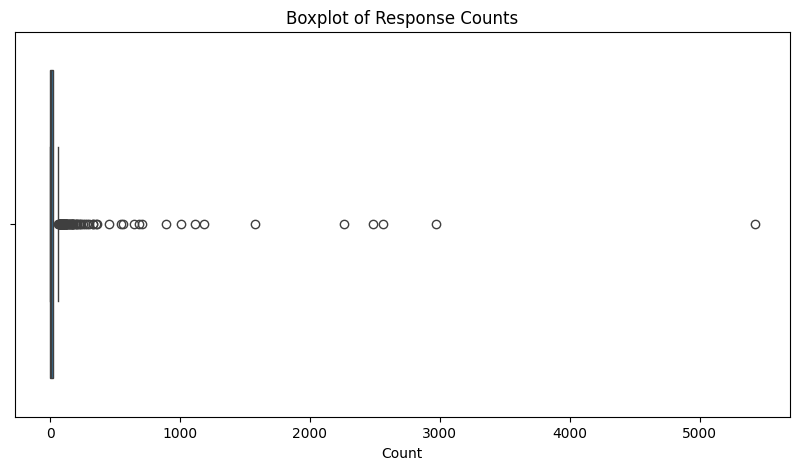

In [42]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Count'])
plt.title("Boxplot of Response Counts")
plt.show()


In [43]:
!pip install wordcloud


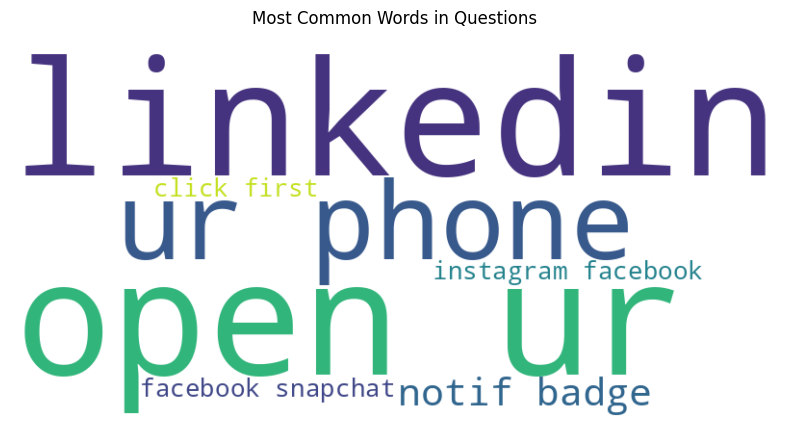

In [44]:
# Word Cloud for Question column
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['Question'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Questions")
plt.show()



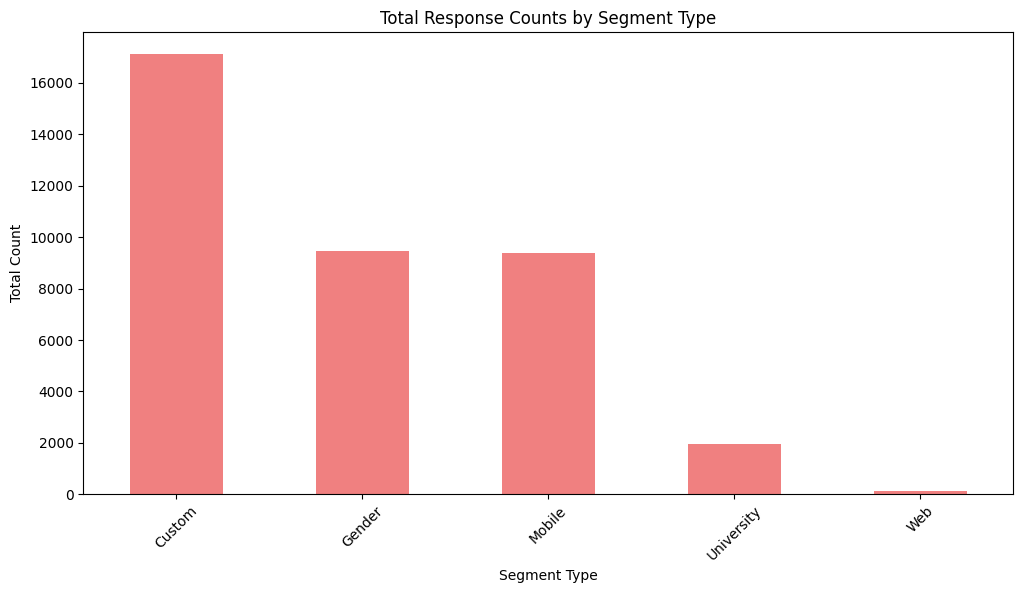

In [45]:
# Segment Comparison
df_grouped = df.groupby('Segment Type')['Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', color='lightcoral')
plt.title("Total Response Counts by Segment Type")
plt.xlabel("Segment Type")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.show()

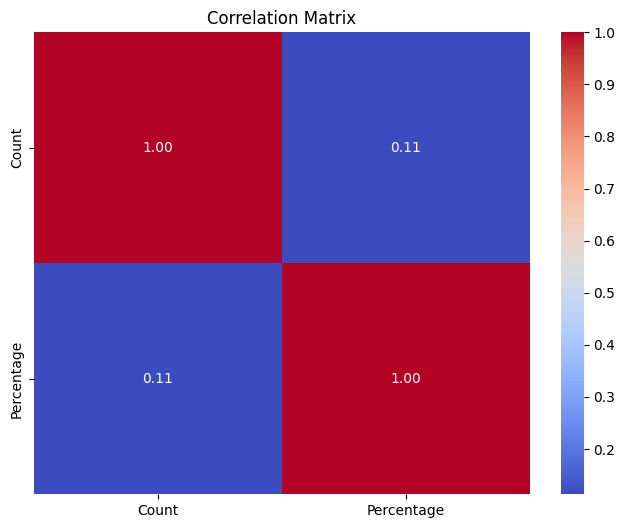

Analysis complete!


In [46]:
# Correlation heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

print("Analysis complete!")